# Import 

In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt
import seaborn as sns


# Data Cleaning

In [2]:
titanic = pd.read_csv(r"C:\Users\User\Downloads\titanic.csv")

#fill missing values
titanic = titanic.fillna({"Age": titanic.Age.median(), "Embarked": titanic.Embarked.mode()[0]})


#drop attribute that not important
titanic = titanic.drop(["PassengerId", "Name", "Ticket", "Cabin"], axis=1)


#one-hot-encoding; splitting the categorical data
titanic = pd.get_dummies(titanic, columns=["Sex", "Embarked"])

#min-max normalization
scaler = MinMaxScaler()
titanic[["Pclass", "Age", "SibSp", "Parch", "Fare"]] = scaler.fit_transform(titanic[["Pclass", "Age", "SibSp", "Parch", "Fare"]])


titanic.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,1.0,0.271174,0.125,0.0,0.014151,0,1,0,0,1
1,1,0.0,0.472229,0.125,0.0,0.139136,1,0,1,0,0
2,1,1.0,0.321438,0.000,0.0,0.015469,1,0,0,0,1
3,1,0.0,0.434531,0.125,0.0,0.103644,1,0,0,0,1
4,0,1.0,0.434531,0.000,0.0,0.015713,0,1,0,0,1


# Train Test Split

In [3]:
X = titanic[['Pclass','Age','SibSp', 'Parch','Fare','Sex_female','Sex_male','Embarked_C', 'Embarked_Q','Embarked_S' ]]
Y = titanic.Survived

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1)

Y_train = Y_train.values.reshape((-1,1))
Y_test = Y_test.values.reshape((-1,1))

X_train

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
622,1.0,0.246042,0.125,0.166667,0.030726,0,1,1,0,0
677,1.0,0.220910,0.000,0.000000,0.019210,1,0,0,0,1
880,0.5,0.308872,0.000,0.166667,0.050749,1,0,0,0,1
5,1.0,0.346569,0.000,0.000000,0.016510,0,1,0,1,0
647,0.0,0.698417,0.000,0.000000,0.069291,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...
13,1.0,0.484795,0.125,0.833333,0.061045,0,1,0,0,1
797,1.0,0.384267,0.000,0.000000,0.016949,1,0,0,0,1
665,0.5,0.396833,0.250,0.000000,0.143462,0,1,0,0,1
295,0.0,0.346569,0.000,0.000000,0.054107,0,1,1,0,0


# Activation Function

In [4]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def accuracy(predictions, labels):
    predicions_correct = predictions.round() == labels
    accuracy = predicions_correct.mean()
    return accuracy

# Parameter

In [5]:
lr = 0.8
epochs = 1000

inputNum = 10
hidden = 6
outputNum = 1

titanic.shape


(891, 11)

# Initialize Weight

In [6]:
np.random.seed(10)
weights1 = np.random.normal(scale=0.5, size=(inputNum, hidden))   # (10, 6)
weights2 = np.random.normal(scale=0.5, size=(hidden, outputNum))  # (6, 1)

#weights1 
#weights2

# Training Data

In [7]:
N = Y_train.size
monitoring = {"accuracy": []}

def train(lr, epochs,weights1, weights2):
    
    for epoch in range(epochs):
        if(epoch==0):
            wc1,wc2 = 0.0,0.0

        # feedforward
        hidden_layer = sigmoid(np.dot(X_train, weights1))        
        output_layer = sigmoid(np.dot(hidden_layer, weights2)) 

        # monitor training process
        acc = accuracy(output_layer, Y_train)
        monitoring["accuracy"].append(acc)

        # backpropagation
        output_layer_delta = (output_layer - Y_train) * output_layer * (1 - output_layer)                
        hidden_layer_delta = np.dot(output_layer_delta, weights2.T) * hidden_layer * (1 - hidden_layer) 
        
        # Calulation without momentum
        #weight updates
        weights2 -= (lr * np.dot(hidden_layer.T, output_layer_delta)  / N)    
        weights1 -= (lr * np.dot(X_train.T, hidden_layer_delta)  / N)
      
                
        if(epoch%100==0 and epoch!=0):
            print("\nEpoch {}".format(epoch))
            print("Training Accuracy: {}".format(acc))
                    
    print("\n\nFinal Epoch {} - Accuracy({})".format(epochs,acc))


train(lr, epochs, weights1, weights2)


monitoring_titanic = pd.DataFrame(monitoring)


Epoch 100
Training Accuracy: 0.6279650436953808

Epoch 200
Training Accuracy: 0.7303370786516854

Epoch 300
Training Accuracy: 0.797752808988764

Epoch 400
Training Accuracy: 0.7940074906367042

Epoch 500
Training Accuracy: 0.7940074906367042

Epoch 600
Training Accuracy: 0.7940074906367042

Epoch 700
Training Accuracy: 0.797752808988764

Epoch 800
Training Accuracy: 0.7990012484394506

Epoch 900
Training Accuracy: 0.7990012484394506


Final Epoch 1000 - Accuracy(0.8027465667915106)


# Graph

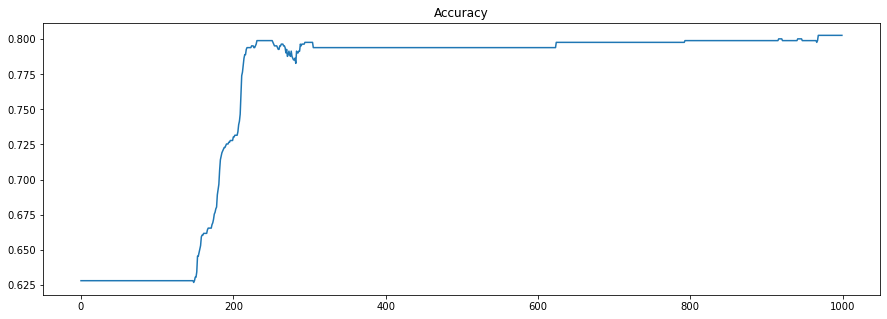

In [8]:
axes = plt.subplots(figsize=(15,5))
monitoring_titanic.accuracy.plot(ax=axes[1], title="Accuracy");

# Test Data 

In [9]:
hidden_layer_inputs = np.dot(X_test, weights1)
hidden_layer_outputs = sigmoid(hidden_layer_inputs)

output_layer_inputs = np.dot(hidden_layer_outputs, weights2)
output_layer_outputs = sigmoid(output_layer_inputs)

acc = accuracy(output_layer_outputs, Y_test)
print("Testing Accuracy: {}".format(acc))

Testing Accuracy: 0.7333333333333333


# Confusion Matrix

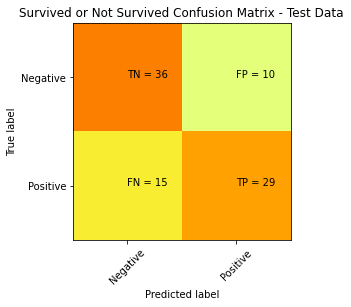

In [10]:
corr = titanic.corr()

#print(corr.Survived)

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

logit = LogisticRegression(random_state= 0)
logit.fit(X_train, Y_train.ravel())

Y_predicted = logit.predict(X_test)

cm = confusion_matrix(Y_test, Y_predicted)
#print(cm)

plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Negative','Positive']
plt.title('Survived or Not Survived Confusion Matrix - Test Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()